In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    StratifiedKFold,
    cross_validate
)
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    precision_score,
    accuracy_score,
    recall_score
)
warnings.filterwarnings('ignore')

### 1. Loading Data

In [3]:
X_train = np.load('Artifacts/X_train.npz')['arr_0']
Y_train = np.load('Artifacts/Y_train.npz')['arr_0']
X_test = np.load('Artifacts/X_test.npz')['arr_0']
Y_test = np.load('Artifacts/Y_test.npz')['arr_0']

### 2. Configure K-Fold CV

In [4]:
cv = StratifiedKFold(
    n_splits=6,
    random_state=42,
    shuffle=True

)

In [5]:
model_lr = LogisticRegression(
    random_state=42,
    max_iter=1000
)

In [6]:
cv_results = cross_validate(
    model_lr,
    X_train,
    Y_train,
    cv=cv, scoring='accuracy',
    return_train_score=False

)

In [7]:
score_array = ['accuracy','precision','recall','f1']

for score in score_array:
    cv_results = cross_validate(
            model_lr,
            X_train,
            Y_train,
            cv=cv, scoring=score,
            return_train_score=False
                     )
    test_score = cv_results['test_score']
    test_score_avg = np.mean(test_score)
    print(f'{score} : {test_score_avg}')

accuracy : 0.7941038454666792
precision : 0.7840720349162402
recall : 0.8117435476746387
f1 : 0.7976501149190063


In [8]:
cv_results = cross_validate(
    model_lr,
    X_train,
    Y_train,
    cv=cv, scoring='f1',
    return_train_score=False

)

cv_results

{'fit_time': array([0.09898067, 0.01849437, 0.03047538, 0.04532123, 0.02703023,
        0.02183485]),
 'score_time': array([0.00214839, 0.        , 0.        , 0.00199986, 0.00299954,
        0.        ]),
 'test_score': array([0.79714286, 0.7925341 , 0.79744136, 0.79142857, 0.79772889,
        0.80962491])}

In [9]:
best_index = np.argmax(cv_results['test_score'])
fold_indeces = list(cv.split(X_train,Y_train))

best_train_idx, best_test_idx = fold_indeces[best_index]
X_train_best = X_train[best_train_idx]
Y_train_best = Y_train[best_train_idx]
X_test_best = X_train[best_test_idx]
Y_test_best = Y_train[best_test_idx]

In [10]:
model_lr = LogisticRegression(
    random_state = 42,
    max_iter=1000
)

model_lr.fit(X_train_best,Y_train_best)

LogisticRegression(max_iter=1000, random_state=42)

In [11]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

In [12]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1 = f1_score(Y_test, Y_hat_test)

In [13]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7700
Precision: 0.5495
Recall: 0.7292
F1 Score: 0.6267


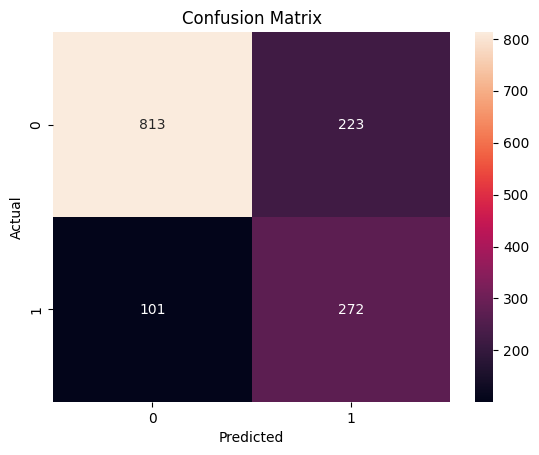

In [14]:
cm = confusion_matrix(Y_test, Y_hat_test)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()